In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import torch

# Modeli Torch Hub üzerinden yükle
model = torch.hub.load("bryandlee/animegan2-pytorch:main", "generator", pretrained="face_paint_512_v2").eval()

print("AnimeGANv2 PyTorch modeli başarıyla yüklendi!")

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/bryandlee/animegan2-pytorch/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://github.com/bryandlee/animegan2-pytorch/raw/main/weights/face_paint_512_v2.pt" to /root/.cache/torch/hub/checkpoints/face_paint_512_v2.pt
100%|██████████| 8.20M/8.20M [00:00<00:00, 70.1MB/s]

AnimeGANv2 PyTorch modeli başarıyla yüklendi!


In [3]:
from PIL import Image

# face2paint yardımcı fonksiyonunu yükle
face2paint = torch.hub.load("bryandlee/animegan2-pytorch:main", "face2paint", size=512)

print("Face2paint yardımcı fonksiyonu başarıyla yüklendi!")

Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main


Face2paint yardımcı fonksiyonu başarıyla yüklendi!


In [6]:
# Görsel yolunu belirtin
image_path = '/content/drive/MyDrive/AnimeGANv2/face.jpeg'

# Görseli yükleyin
input_image = Image.open(image_path).convert("RGB")

# Görseli işleyin
output_image = face2paint(model, input_image)

# Çıktıyı kaydedin
output_image.save('/content/drive/MyDrive/AnimeGANv2/face_animeganv2otherResult.jpeg')

print("Görsel başarıyla işlendi ve kaydedildi!")


Görsel başarıyla işlendi ve kaydedildi!


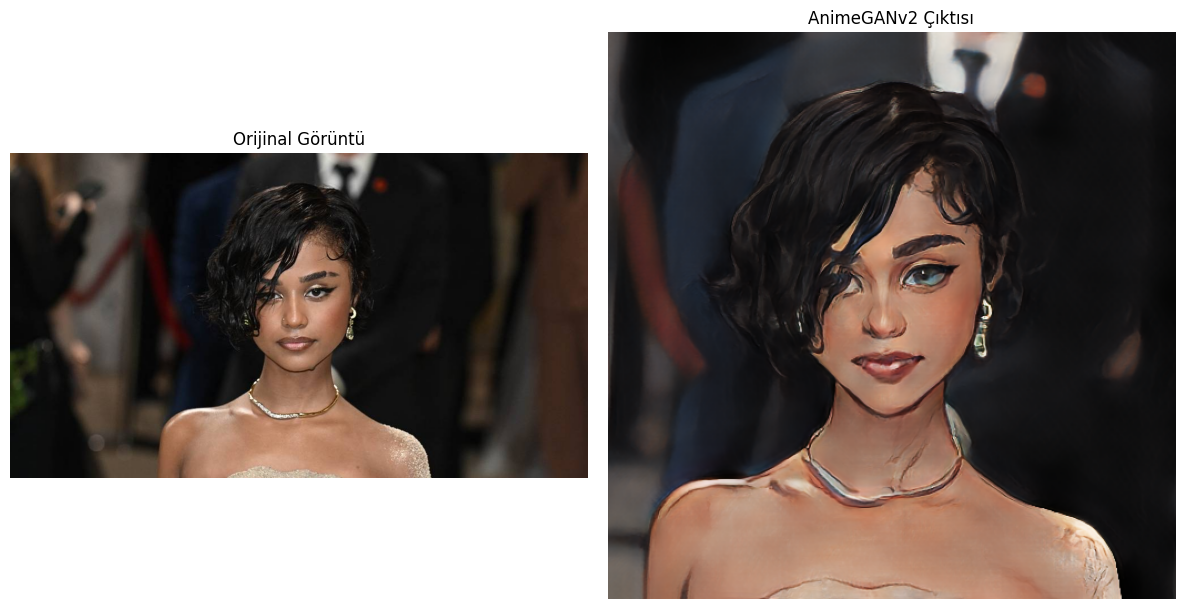

In [10]:
import matplotlib.pyplot as plt

# Orijinal ve işlenmiş görüntüyü yan yana göstermek
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Orijinal görüntü
axes[0].imshow(input_image)
axes[0].set_title("Orijinal Görüntü")
axes[0].axis("off")

# İşlenmiş görüntü
axes[1].imshow(output_image)
axes[1].set_title("AnimeGANv2 Çıktısı")
axes[1].axis("off")

plt.tight_layout()
plt.show()
